In [79]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('df.csv', index_col=0)
df.shape

(226486, 5)

In [81]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)

# encode categories
df_categories = pd.get_dummies(df['category_id'])
df_categories.columns = ['category_1', 'category_2', 'category_3']
df = pd.concat([df, df_categories], axis=1).drop('category_id', axis=1)
df

,date,sku_id,sales_price,sales_quantity,year,month,day,category_1,category_2,category_3
78161,2016-11-25,1108,457.60,1.0,2016,11,25,1,0,0
81079,2016-11-18,2999,470.60,1.0,2016,11,18,1,0,0
81177,2016-11-18,1428,717.60,1.0,2016,11,18,1,0,0
81292,2016-11-18,3923,383.50,1.0,2016,11,18,1,0,0
81416,2016-11-18,8075,18.85,2.0,2016,11,18,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20778441,2020-10-14,21442,570.70,1.0,2020,10,14,1,0,0
20778451,2020-10-14,502340,505.70,3.0,2020,10,14,1,0,0
20778611,2020-10-14,723588,401.70,3.0,2020,10,14,1,0,0
20779790,2020-10-17,792124,778.70,1.0,2020,10,17,1,0,0


In [82]:
# splitting data into train and test
number_of_dates = df.date.nunique()
dates = df.date.unique()
date_to_split = dates[int(number_of_dates*0.8)]

train = df[df.date < date_to_split].drop('date', axis=1)
test = df[df.date >= date_to_split].drop('date', axis=1)

X_train, y_train = train.drop('sales_quantity', axis=1), train['sales_quantity']
X_test, y_test = test.drop('sales_quantity', axis=1), test['sales_quantity']
X_train.shape, y_train.shape

((171953, 8), (171953,))

Mean Squared Error: 4544.962771162691


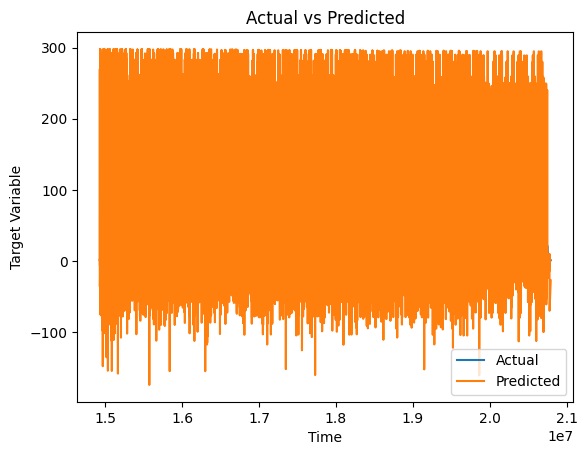

In [83]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize predictions
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()